# Project Title: Customer Churn Analysis

**Role:** Data Analyst  
**Audience:** Hiring Manager  
**Last updated:** 2025-09-17

**Author:** Ché Morris

---

## 1. Executive Summary
This project analyses customer churn in a subscription-based telecom dataset to identify the main drivers of customer attrition and recommended strategies to improve retention. Customer churn directly impacts recurring revenue, and reducing it can significantly improve profitability.  

**Approach**  
- Perform exploratory data analysis (EDA) to understand customer demographics, account details, and service usage.  
- Identify patterns and correlations between customer attributes and churn behavior.  
- Quantified churn rates by key drivers to highlight areas of concern.  
- Translate findings into business recommendations that can help reduce churn.  

**Key Findings**  
- Overall churn rate: 26.5%.
- Customers on month-to-month contracts churn at 42.7%, compared to only 11.3% for one-year and 2.8% for two-year contracts.
- Customers paying via electronic check churn at 45.3%, much higher than other payment methods (15–19%).
- Customers with tenure under 1 year churn nearly half the time (62.0%), while those with 4+ years churn at less than 15%.
- Customers with Tech Support (15.2%) or Online Security (14.6%) are far less likely to churn than those without (~42%).

**Recommendation**  
- Incentivize month-to-month customers to switch to longer-term contracts.
- Encourage electronic check users to adopt automatic payments (credit card or bank transfer).
- Prioritize retention efforts for new customers within their first year.
- Bundle and promote Tech Support and Online Security services to improve retention.

---

## 2. Data & Assumptions
- **Dataset Source:** [Telco Customer Churn Dataset](https://www.kaggle.com/blastchar/telco-customer-churn).  
- **Description:** 7,043 customer records with demographic details, account information, services subscribed, and churn flag.  
- **Assumptions & Caveats:**  
  - Data is anonymized; features may not capture all real-world churn drivers.  
  - No time-series element (snapshot data), so trends over time are not visible.  
  - Percentages are calculated within groups; small sample sizes may distort some values.  

---

## 3. Exploratory Data Analysis (EDA)
- Inspect data structure and missing values.  
- Analysed churn distribution (26.5% churn).
- Explored customer demographics and tenure.
- Compared churn rates across contract types, payment methods, and monthly charges.  
- Evaluated the impact of services (Tech Support, Online Security, etc.) on churn.
- Generated correlation heatmap of numeric variables.

**Takeaway goal:** Churn risk is highest among short-tenure, month-to-month customers paying by electronic check and lacking support/security services.

---

## 4. Analysis
- Focused on descriptive analysis and churn segmentation.
- Grouped customers by tenure cohorts and service adoption to identify high-risk profiles.  
- Quantified churn rates as percentages for clear business interpretation.

---

## 5. Results & Interpretation
- Clear patterns emerge: contract type, payment method, tenure, and support/security services are the strongest churn drivers. 
- Findings align with business intuition: newer, less committed, and less supported customers are more likely to leave. 

---

## 6. Recommendations
- **Contracts:** Incentivize month-to-month customers to commit to longer terms.
- **Payments:** Migrate electronic check customers to automatic payment methods.
- **Retention:** Focus retention campaigns on first-year customers.
- **Services:** Offer bundled Tech Support and Online Security packages as churn-reduction levers. 
- **Next Steps:** Add predictive modeling (logistic regression, decision tree) in future versions to identify at-risk customers in real time.

---

## 7. Reproducibility
- **Environment:** Python 3.11, Pandas, Seaborn, Matplotlib. packages listed in `requirements.txt`.  
- **How to run:**  
  1. Clone the repository.  
  2. Install dependencies: `pip install -r requirements.txt`.  
  3. Launch Jupyter Notebook: `jupyter notebook`.  
  4. Open `notebooks/churn_analysis.ipynb` and run all cells.  
- **Data:** Available from Kaggle (link above). Place dataset in `data/raw/` before running notebook.


In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set display + style options
pd.set_option("display.float_format", "{:,.2f}".format)
plt.rcParams["figure.figsize"] = (8, 5)
sns.set_style("whitegrid")

In [3]:
import os

# Show current working directory
print("Current working directory:", os.getcwd())

# Build a relative path to data
file_path = os.path.join("..", "data", "raw", "Telco-Customer-Churn-Data.csv")

# Try to load the file
try:
    df = pd.read_csv(file_path)
    print("✅ Data loaded successfully")
    display(df.head())
except FileNotFoundError:
    print("⚠️ Dataset not found. Please make sure 'Telco-Customer-Churn.csv' is in data/raw/")


Current working directory: C:\Users\user\Jupyter Notebooks\Public Projects\notebooks
✅ Data loaded successfully


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for the dimensions
print("Dataset Shape:", df.shape)

# Check data types and missing values
df.info()



Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [5]:
# Look at some of the statistics transposed for first 15 headers
df.describe(include="all").T.head(15)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,"7,043.00",NaN,NaN,NaN,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,"7,043.00",NaN,NaN,NaN,32.37,24.56,0.00,9.00,29.00,55.00,72.00
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# No. of duplicates
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [8]:
# Check the Churn as a value and percentage
print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No    0.73
Yes   0.27
Name: proportion, dtype: float64


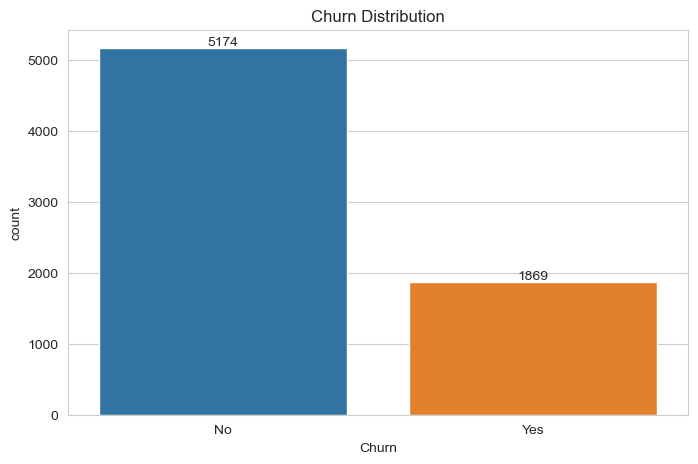

Churn
No    73.46
Yes   26.54
Name: proportion, dtype: float64

In [61]:
# Visualisation
a = sns.countplot(x="Churn", data=df)

# Display the values for each container
for container in a.containers:
    a.bar_label(container)

plt.title("Churn Distribution")
plt.show()

# Detailed Analysis including percentages for insights
df["Churn"].value_counts(normalize=True) * 100

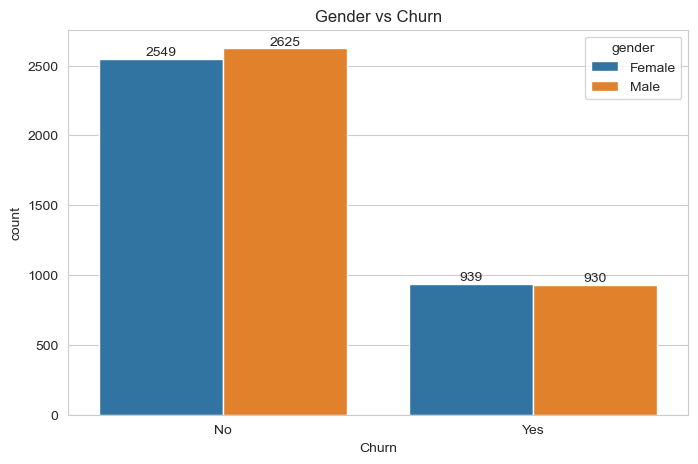

gender  Churn
Female  No      73.08
        Yes     26.92
Male    No      73.84
        Yes     26.16
Name: proportion, dtype: float64

In [51]:
# Visualisation of Gender vs Churn
b = sns.countplot(x="Churn", hue="gender", data=df)

# Display the values for each container
for container in b.containers:
    b.bar_label(container)

plt.title("Gender vs Churn")
plt.show()

# Detailed Analysis including percentages for insights
df.groupby("gender")["Churn"].value_counts(normalize=True) * 100

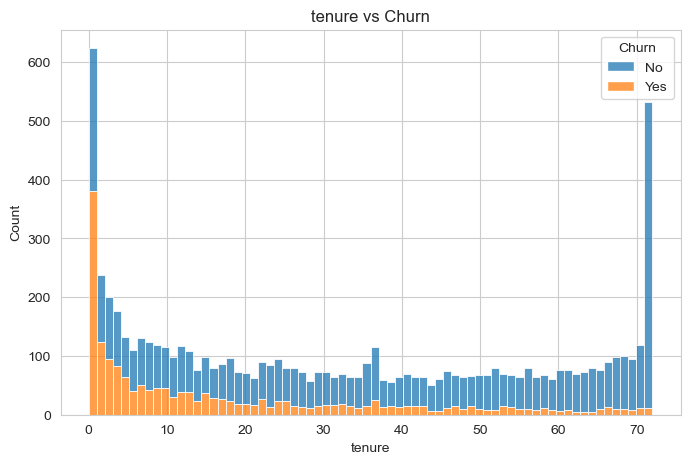

tenure  Churn
0       No      100.00
1       Yes      61.99
        No       38.01
2       Yes      51.68
        No       48.32
3       No       53.00
        Yes      47.00
4       No       52.84
        Yes      47.16
5       No       51.88
        Yes      48.12
6       No       63.64
        Yes      36.36
7       No       61.07
        Yes      38.93
8       No       65.85
        Yes      34.15
9       No       61.34
        Yes      38.66
10      No       61.21
        Yes      38.79
11      No       68.69
        Yes      31.31
12      No       67.52
        Yes      32.48
Name: proportion, dtype: float64


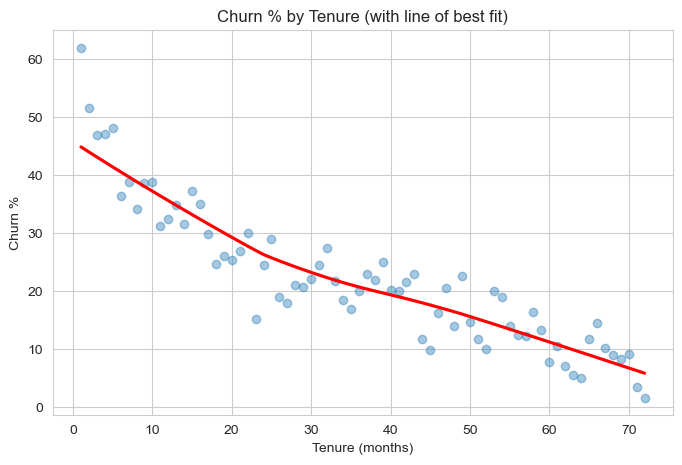

In [82]:
# Visualisation of tenure vs Churn 
c = sns.histplot(data=df, x="tenure", hue="Churn",multiple="stack", bins=70)

plt.title("tenure vs Churn")
plt.show()

# Detailed Analysis including percentages for insights
# This can also be done by grouping the bins by tenure among other ways
print(df.groupby("tenure")["Churn"].value_counts(normalize=True).head(25) * 100)

# Compute churn percentages by tenure
tenure_churn = (df.groupby("tenure")["Churn"].value_counts(normalize=True).unstack() * 100)

# Plot scatter + regression line
sns.regplot(
    x=tenure_churn.index,
    y=tenure_churn["Yes"],
    lowess=True,   # locally weighted regression (curvy line of best fit)
    scatter_kws={'alpha':0.4},  # faded scatter points
    line_kws={'color':'red'}
)

plt.title("Churn % by Tenure (with line of best fit)")
plt.xlabel("Tenure (months)")
plt.ylabel("Churn %")
plt.show()

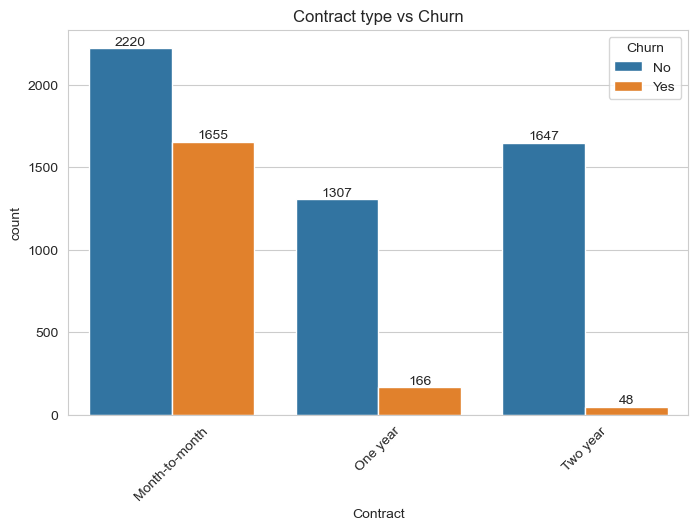

Contract        Churn
Month-to-month  No      57.29
                Yes     42.71
One year        No      88.73
                Yes     11.27
Two year        No      97.17
                Yes      2.83
Name: proportion, dtype: float64

In [42]:
# Visualisation of Contract type vs Churn
d = sns.countplot( x="Contract", hue="Churn", data=df)

# Display the values for each container
for container in d.containers:
    d.bar_label(container)
    
plt.xticks(rotation=45)
plt.title("Contract type vs Churn")
plt.show()

# Detailed Analysis including percentages for insights
df.groupby("Contract")["Churn"].value_counts(normalize=True) * 100


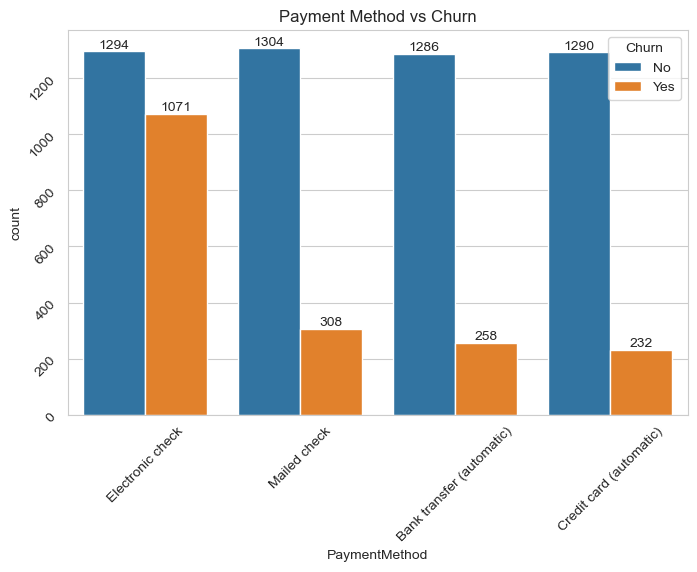

PaymentMethod              Churn
Bank transfer (automatic)  No      83.29
                           Yes     16.71
Credit card (automatic)    No      84.76
                           Yes     15.24
Electronic check           No      54.71
                           Yes     45.29
Mailed check               No      80.89
                           Yes     19.11
Name: proportion, dtype: float64

In [56]:
# Payment method vs Churn
e = sns.countplot(data=df, x="PaymentMethod", hue="Churn")

# Display the values for each container
for container in e.containers:
    e.bar_label(container)
    
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()

# Detailed Analysis including percentages for insights
df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True) * 100

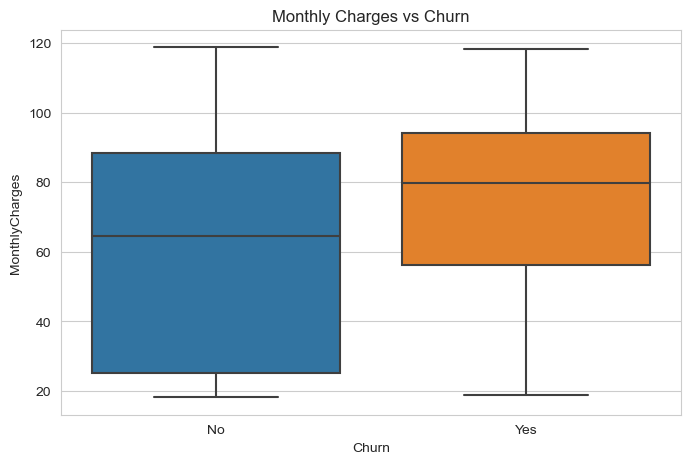

MonthlyCharges  Churn
18.25           No      100.00
18.40           No      100.00
18.55           No      100.00
18.70           No      100.00
18.75           No      100.00
                         ...  
118.20          No      100.00
118.35          Yes     100.00
118.60          No      100.00
118.65          No      100.00
118.75          No      100.00
Name: proportion, Length: 2370, dtype: float64

In [57]:
# Monthly Charges vs Churn
sns.boxplot(x="Churn",y="MonthlyCharges", data=df)  

plt.title("Monthly Charges vs Churn")
plt.show()

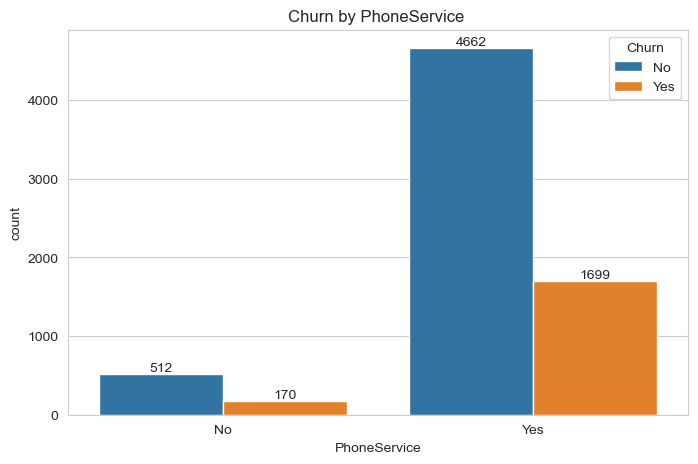

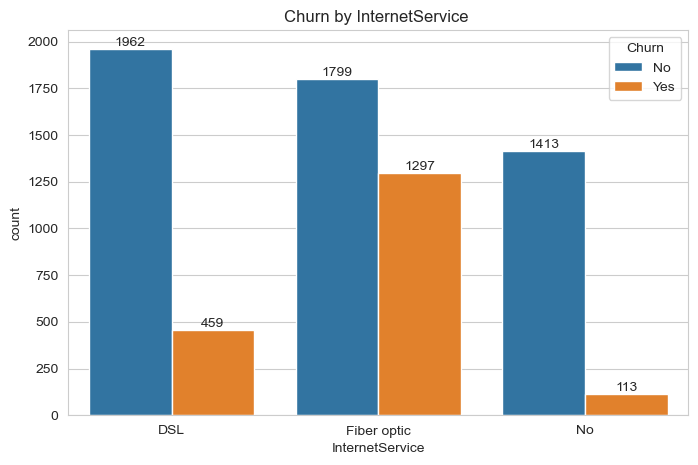

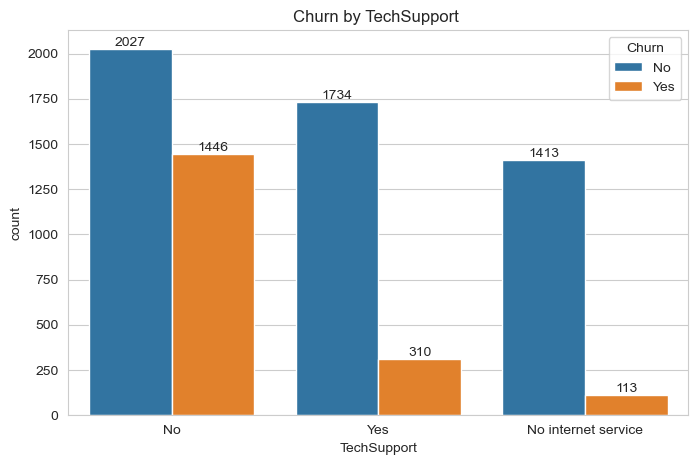

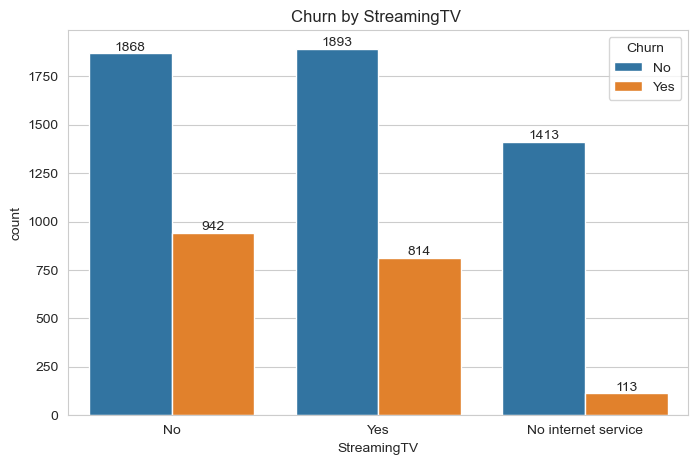

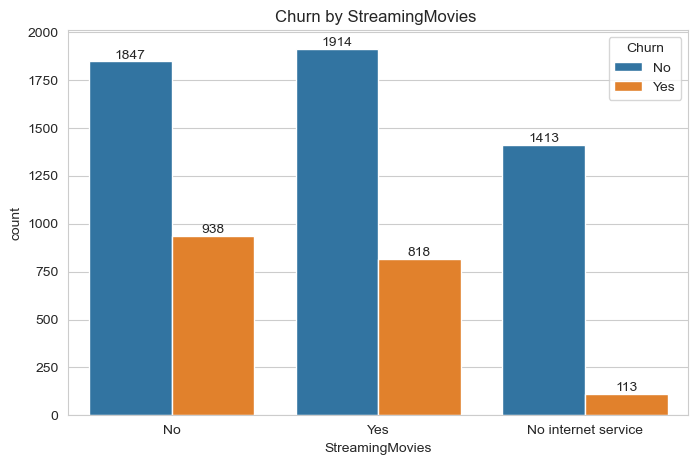

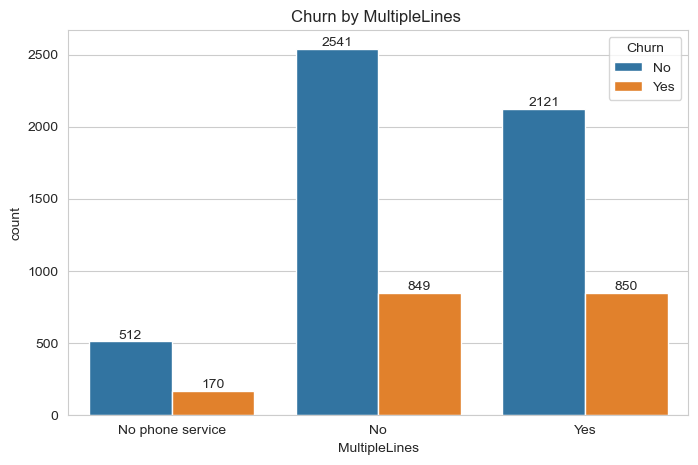

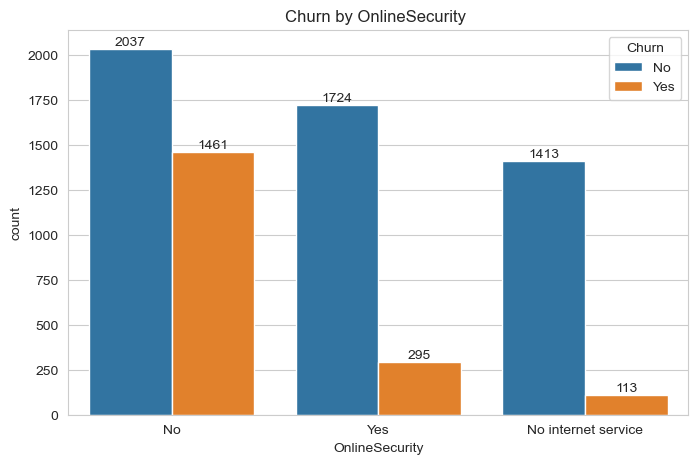

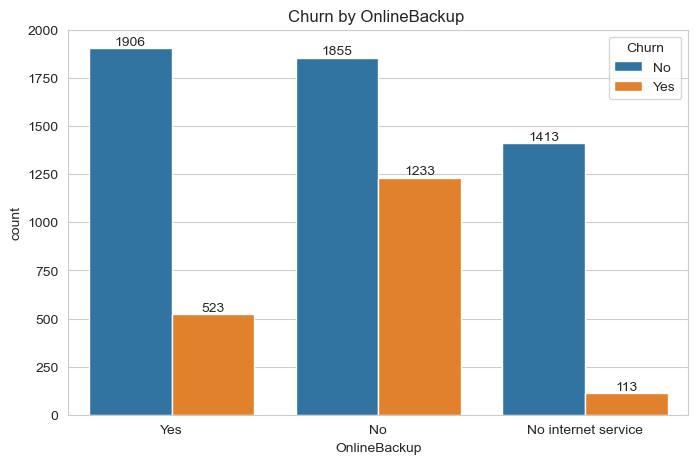

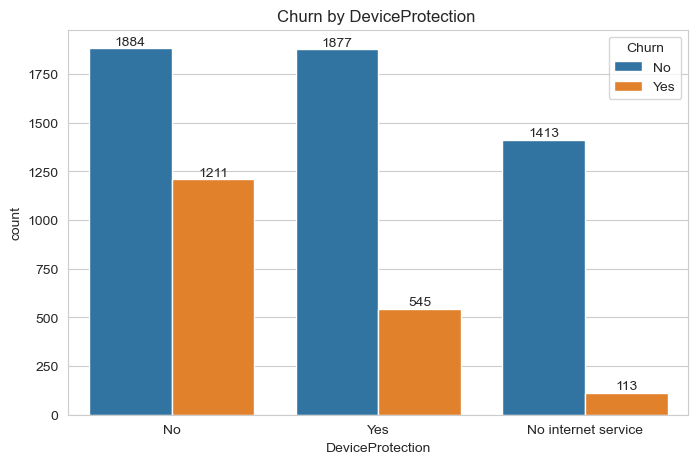

In [77]:
# Identify sevrices that help reduce Churn
service_cols = [
    "PhoneService", 
    "InternetService", 
    "TechSupport", 
    "StreamingTV", 
    "StreamingMovies",
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection"
]

for col in service_cols:
    f = sns.countplot(x=col, hue="Churn", data=df)
    
    # Display the values for each container
    for container in f.containers:
        f.bar_label(container)
    
    plt.title(f"Churn by {col} ")
    plt.show()

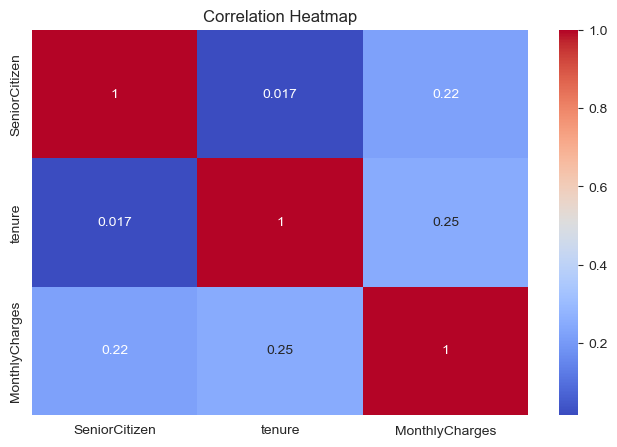

In [48]:
# Select numeric columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Correlation heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**EDA Takeaways**

- Overall churn rate is **26.5%**.  
- Customers on **month-to-month contracts churn at 42.7%**, compared to **11.3% for one year** and only **2.8% for two-year contracts**.  
- Customers paying via **electronic check churn at 45.3%**, much higher than other payment methods (~15–19%).  
- Customers with **tenure under 1 year churn nearly more than ahlf of the time (62.0%)**, while customers with 4+ years churn less than 15%.  
- Customers with **Tech Support (15.2% churn)** or **Online Security (14.6% churn)** are far less likely to churn than those without (~41–42%).  

**Business implications:**  
- Encourage customers to move from month-to-month to longer-term contracts.  
- Promote automatic payments to reduce churn among electronic check users.  
- Focus retention efforts on **new customers** within their first year.  
- Bundle or upsell **Tech Support** and **Online Security** to improve retention.
